<a href="https://colab.research.google.com/github/unknown-jun/First_step_of_data_analist/blob/master/How_many_alcohol_do_South_Korea_drink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **전세계 음주 데이터 분석**

## 1. 데이터 살펴보기

In [32]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from google.colab import files
myfile = files.upload()

In [2]:
drinks = pd.read_csv('drinks.csv')

In [3]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [4]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [5]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000




*   평균적으로 가장 많이 소비되는 술은 맥주
*   모든 술의 편차는 매우 크다. 
*   이는 이슬람국가들은 술을 전혀 소비하지 않기 때문이다.



## 2. 탐색과 시각화

**[Feature 간의 상관관계 탐색]**

In [6]:
cols = ['beer_servings', 'wine_servings', 'spirit_servings', 'total_litres_of_pure_alcohol']
corr= drinks[cols].corr(method = 'pearson')
corr

,beer_servings,wine_servings,spirit_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.527172,0.458819,0.835839
wine_servings,0.527172,1.000000,0.194797,0.667598
spirit_servings,0.458819,0.194797,1.000000,0.654968
total_litres_of_pure_alcohol,0.835839,0.667598,0.654968,1.000000


**[pearson 상관계수]**

두 계량형 변수 사이의 선형관계의 강도와 방향을 알려줌

[강도]
*   상관계수 값의 범위는 -1부터 +1까지이며 절대값이 클수록 변수사이의 강한 관계임
*   절대값 1은 완전한 선형관계를 나타내며 0에 가까울수록 변수들의 선형관계가 없음

[고려해야 할 점]
*  상관 계수만을 이용하여 한 변화가 다른 변화를 유발한다는 결론을 내는 건 적절하지 않음
*  pearson 상관계수는 극단 데이터 값에 영향을 많이 받음
*  따라서 극단 값이 있다면 비정상적인 일회성 사건과 연관된 데이터를 삭제해야 함
*  낮은 상관계수는 변수 사이에 관계가 없다는 것을 의미하진 않음
*  이는 비선형관계일수도 있으므로 산점도나 fitted-line-plot를 참고해야 함


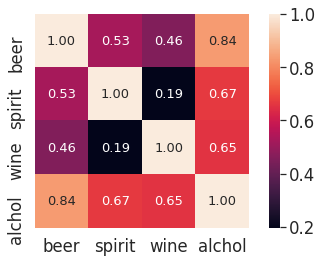

In [7]:
cor_view = ['beer', 'spirit', 'wine', 'alchol']
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                 cbar = True,                # 진한 강도의 정도를 나타냄
                 annot = True,               # 각 네모칸 안에 상관계수를 적어줌
                 square = True,              # 칸을 정사각형으로 만들어줌
                 fmt = '.2f',                # percentation 조절
                 annot_kws = {'size': 13},   # 상관계수의 font 크기
                 yticklabels=cor_view,       # index 표시
                 xticklabels=cor_view)
plt.tight_layout()
plt.show()

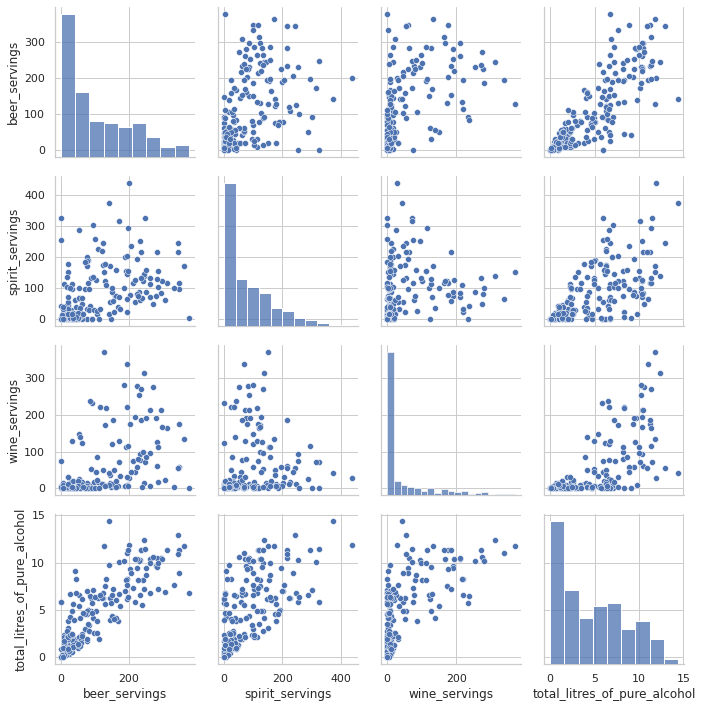

In [8]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings',
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

## 3. 결측 데이터 전처리

In [9]:
print(drinks.isnull().sum())
print('---------------------------------------')
drinks.dtypes

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
---------------------------------------


country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [10]:
drinks.loc[drinks['continent'].isin(['NaN'])]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent


In [11]:
# continent의 결측치를 북미 대륙으로 통합
drinks['continent'] = drinks['continent'].fillna('NA')

In [12]:
drinks.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NA
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [13]:
drinks['continent'].value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

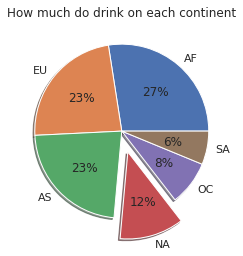

In [14]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels = labels, autopct = '%0.f%%', shadow=True)
plt.title('How much do drink on each continent')
plt.show()

In [15]:
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
NA,165.739130,68,438,3812
OC,58.437500,0,254,935


In [16]:
drinks.loc[drinks['continent'].isin(['NA'])]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NA
11,Bahamas,122,176,51,6.3,NA
14,Barbados,143,173,36,6.3,NA
17,Belize,263,114,8,6.8,NA
32,Canada,240,122,100,8.2,NA
41,Costa Rica,149,87,11,4.4,NA
43,Cuba,93,137,5,4.2,NA
50,Dominica,52,286,26,6.6,NA
51,Dominican Republic,193,147,9,6.2,NA
54,El Salvador,52,69,2,2.2,NA


In [24]:
# 전체 평균보다 많은 음주를 하는 대륙을 구함
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby(['continent'])['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
continent_over_mean

continent
EU    8.617778
NA    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [25]:
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
beer_continent

'EU'

북미 대륙은 모든 국가가 음주를 함

유럽은 평균적으로도 총합으로도 가장 많은 술을 소비함

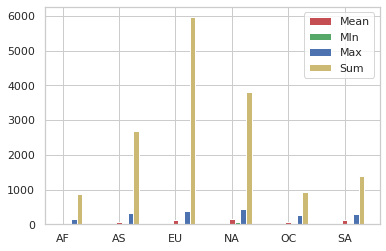

In [28]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, 
                 color='r',
                 label = 'Mean')

rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color = 'g',
                 label = 'MIn')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color = 'b',
                 label = 'Max')

rects4 = plt.bar(index + bar_width * 3, sums, bar_width, 
                 color = 'y',
                 label = 'Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

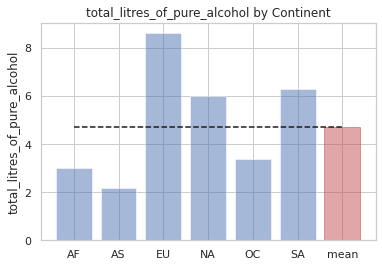

In [33]:
# 대륙별 total_litres_of_pure_alchol을 시각화
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents)-1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

In [37]:
# total_servings 피처를 생성
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 술 소비량 대비 알콜 비율 피처를 생성
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 순위 정보를 생성
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


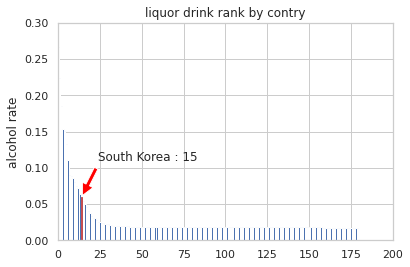

In [38]:
# 국가별 순위 정보를 그래프로 시각화
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()
 
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()